<a href="https://colab.research.google.com/github/FaisalAhmed0/machine_learning_from_scratch/blob/main/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tqdm

In [ ]:
# fix the random seed
seed = 49
np.random.seed(seed)

In [ ]:
def generate_syntheatic_data(size, plot=True):
  '''
  A function to geenrate syntheatic data to test the learning algorithm.
  size: number of samples
  '''
  X, Y = datasets.make_classification(size, 2, 2, 0, random_state=seed, n_clusters_per_class=1, class_sep=1)
  if plot:
    figure = plt.figure(figsize=(10, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.legend(handles=scatter.legend_elements()[0], labels=['class 0', 'class 1'])
  return X, Y

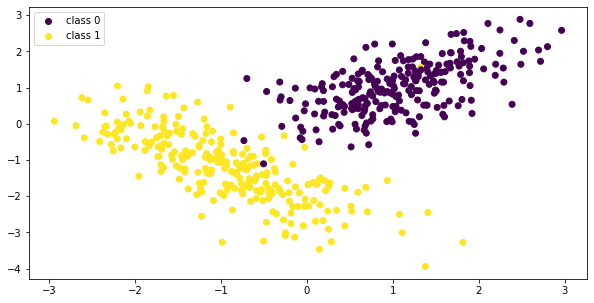

In [ ]:
X, Y = generate_syntheatic_data(500, plot=True)

In [ ]:
def split_valid(X, Y, split_ratio=0.1):
  data_size = X.shape[0]
  valid_length = int(data_size * split_ratio)
  # shuffle the data before splitting
  inds = np.random.choice(range(data_size), data_size, replace=False)
  X = X[inds]
  Y = Y[inds]

  x_valid = X[: valid_length]
  y_valid = Y[: valid_length]

  x_train = X[valid_length: ]
  y_train = Y[valid_length: ]
  return x_train, y_train, x_valid, y_valid

In [ ]:
class LogisticRegression:
  '''
  This class implements simple linear regression
  Constructor:
  lr: learning rate
  epochs: number of training epochs
  solver: either "exact" for exact least squares solution or "sgd" for mini_batch gradient descent
  '''
  def __init__(self, lr=0.1, epochs=100):
    self.lr = lr
    self.epochs = epochs
    self.theta = None
  
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))
  
  def linear(self, x, theta, b):
    return x @ theta + b
  
  def h(self, x, theta, b):
    linear = self.linear(x, theta, b)
    sigmoid = self.sigmoid(linear)
    return sigmoid

  def grad_w(self, x, y, theta, b):
    h = self.h(x, theta, b)
    grad = (h - y) @ x
    return np.mean(grad)

  def grad_b(self, x, y, theta, b):
    h = self.h(x, theta, b)
    grad = (h - y)
    return np.mean(grad)
  
  def loss(self, x, y, theta, b):
    h = self.h(x, theta, b)
    l = - np.mean(y*np.log(h) + (1-y)*np.log(1-h))
    return l

  def _sgd(self, X, Y , X_valid=None, Y_valid=None, mini_batch_size=1, options=None):
    '''
    X: input matrix (Design matrix) of the shape (N, D), where N is the number of example, D is the input dimension (number of features)
    Y: the ground truth for each example shape: (N, )
    mini_batch_size: size of the sample during each training iteration if mini_batch_size == batch_size then its a full batch gradient descent
    '''
    data_size = X.shape[0] # number of examples
    input_dim = X.shape[1] # input dimension (number of features)
    theta = np.random.randn(input_dim,) # initlize the parameters randomly
    b = 0 # initlize the bias to zero
    n_iteration = data_size // mini_batch_size if data_size % mini_batch_size == 0 else data_size // mini_batch_size + 1
    loop = tqdm.tqdm_notebook(range(self.epochs))
    losses = []
    val_losses = []
    # print(theta.shape)
    # for each pass through the data
    for epoch in loop:
      # shuffle the data
      inds = np.random.choice(range(data_size), data_size, replace=False)
      X = X[inds]
      Y = Y[inds]
      loss = 0
      for iter in range(n_iteration):
        start = iter*mini_batch_size 
        end = (iter+1)*mini_batch_size if (iter+1)*mini_batch_size < data_size else data_size
        
        x_iter = X[start : end]
        y_iter = Y[start : end]
        # print(x_iter.shape)
        # print(theta.shape)
        grad_theta = self.grad_w(x_iter, y_iter, theta, b)
        grad_b = self.grad_b(x_iter, y_iter, theta, b)

        theta -= self.lr * grad_theta
        b -= self.lr * grad_b

        loss += self.loss(x_iter, y_iter, theta, b)
      loss /= n_iteration
      loop.set_description("Loss %0.3f" %loss)
      losses.append(loss)

      if not (X_valid is None and Y_valid is None):
        loss = self.loss(X_valid, Y_valid, theta, b)
        val_losses.append(loss)

    self.theta = theta
    self.b = b
    return losses, val_losses

  def fit(self, X, Y, X_valid=None, Y_valid=None , mini_batch_size=1, options=None):
    losses, val_losses = self._sgd(X, Y, mini_batch_size=mini_batch_size, options=options, X_valid=X_valid, Y_valid=Y_valid)
    return losses, val_losses

  def predict(self, x):
    assert not self.theta is None, "Model is not fitted"
    h = self.h(x, self.theta, self.b)
    final_pred = h[:]
    final_pred[h > 0.5] = 1
    final_pred[h <= 0.5] = 0
    return final_pred
  
  def accuracy(self, x, y):
    assert not self.theta is None, "Model is not fitted"
    pred = self.predict(x)
    return 100 * (np.sum(pred == y) / len(y))

  def decisionLine(self, x):
    assert not self.theta is None, "Model is not fitted"
    slope = - (self.theta[0]/self.theta[1])
    intercept = - self.b/self.theta[1]
    return (slope*x + intercept)

In [ ]:
# split the data into train and validation
x_train, y_train, x_valid, y_valid = split_valid(X, Y, 0.3)

In [ ]:
# create and fit a model 
np.random.seed(seed)
model = LogisticRegression(1e-2, 100)
loss, val_loss = model.fit(x_train, y_train, x_valid, y_valid, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [ ]:
# check the model accuracy
train_acc = model.accuracy(x_train, y_train)
val_acc = model.accuracy(x_valid, y_valid)
print(f"Training accuracy: {train_acc}, validation accuracy: {val_acc}")

Training accuracy: 99.42857142857143, validation accuracy: 98.66666666666667


In [ ]:
# function to visulaize the training output
def visualize_results(model, input, target):
  line = model.decisionLine(input[:, 0])
  figure = plt.figure(figsize=(10, 5))
  scatter = plt.scatter(input[:, 0], input[:, 1], c=target)
  plt.legend(handles=scatter.legend_elements()[0], labels=['class 0', 'class 1'])
  plt.plot(input[:,0], line.flatten(), label="Decision boundary")
  plt.legend()

In [ ]:
def plot_loss(loss, val_loss=None):
  plt.figure(figsize=(10, 5))
  epochs = range(1, len(loss)+1 )
  plt.plot(epochs, loss, label="Training loss")
  if val_loss:
    plt.plot(epochs, val_loss, label="Validation loss")
  plt.xlabel("epoch")
  plt.ylabel("Loss")
  plt.title("Loss per epoch")
  plt.legend()

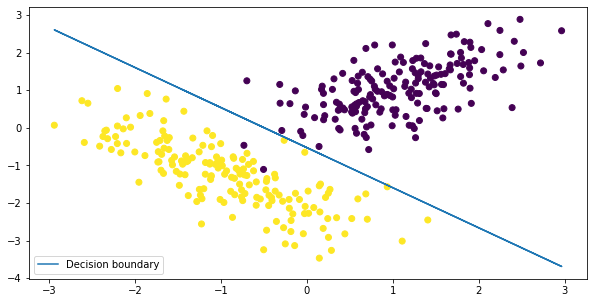

In [ ]:
visualize_results(model, x_train, y_train)

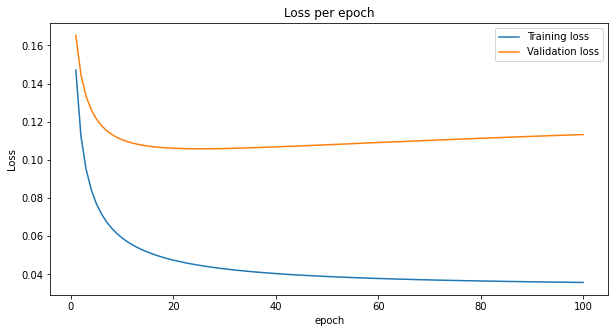

In [ ]:
# plot the loss to see the training dynamics 
plot_loss(loss, val_loss)